In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_MDOF_5_sec.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100  # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0       
        if ensemble%10==0:
            print('ensemble  : ',ensemble)
        for n in range(len(t)-1):
            '''LINEAR PART DRIFT'''
            A = drift_mat(dof,k,c,m)
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW[ensemble][i]    
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y1.append(x[-1,:])   
        y2.append(x[-2,:])      

    y1 = np.array(y1)
    y2 = np.array(y2)

    return y1, y2

In [3]:
np.random.seed(1)
T = 5
dof = 21
x_initial = np.zeros(2*dof)

In [4]:
import time 
start = time.time()
y1, y2 = M_DOF_sys(x_initial, dof, T)
end = time.time()
print('Total time : ', (end-start)/60, '  min')

ensemble  :  0
ensemble  :  10
ensemble  :  20
ensemble  :  30
ensemble  :  40
ensemble  :  50
ensemble  :  60
ensemble  :  70
ensemble  :  80
ensemble  :  90
Total time :  1.7339532097180685   min


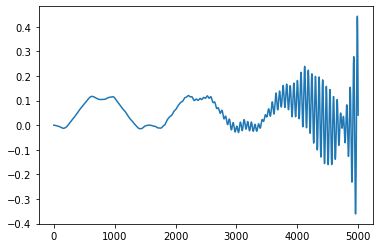

In [5]:
import matplotlib.pyplot as plt
plt.plot(np.mean((y2), axis=0))
plt.show()

In [6]:
pickle.dump(y2, open('MDOF_actual_relia.p', 'wb'))